# Analyzing Public Transportation Usage to enhance Efforts of Reducing Social Isolation

### Install Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

C:\Users\dnhor\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Read in Data

In [2]:
#2018 AARP Survey
df_2018 = pd.read_csv('Data/aarp.csv')

#2017 AARP Survey

#Hopefully Prior year Surveys

# EDA

In [3]:
df_2018.head()

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
0,0,54.0,0.756810,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,No,No,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Yes,1.0
1,1,56.0,2.931238,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Yes,Other,Other,Other,1.0
2,2,67.0,6.867710,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,Yes,No,Yes,...,Other,Selected,Other,NaN,Other,Other,Other,Yes,Yes,2.0
3,3,68.0,0.827716,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,CA,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0
4,4,72.0,0.712991,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move to a different community,No,Yes,No,...,Other,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0


In [4]:
df_2018.describe()

,Unnamed: 0,CaseId,WEIGHT,duration,LGBTFLAG,AGE,HHSIZE,HH01,HH25,HH612,HH1317,HH18OV,Disablecombo,housecomp,countInHouse
count,1947.000000,1947.000000,1947.000000,1947.000000,363.0,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.00000,0.0,0.0,1947.000000
mean,973.000000,4122.983051,1.000000,358.551104,1.0,44.743708,2.833590,0.032357,0.134052,0.216744,0.174114,2.24756,NaN,NaN,1.222393
std,562.194806,2367.516620,1.213575,1169.262974,0.0,17.473649,1.463162,0.196267,0.424102,0.544303,0.473325,1.15069,NaN,NaN,1.088269
min,0.000000,54.000000,0.001845,2.000000,1.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,0.000000
25%,486.500000,2086.500000,0.210824,13.000000,1.0,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,0.000000
50%,973.000000,4161.000000,0.592207,20.000000,1.0,42.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.00000,NaN,NaN,1.000000
75%,1459.500000,6212.000000,1.272429,34.000000,1.0,59.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.00000,NaN,NaN,2.000000
max,1946.000000,8216.000000,10.519664,12563.000000,1.0,90.000000,6.000000,3.000000,3.000000,4.000000,3.000000,10.00000,NaN,NaN,5.000000


In [5]:
df_2018.dtypes

Unnamed: 0        int64
CaseId          float64
WEIGHT          float64
LGBT             object
Q1               object
                 ...   
dumover18        object
dumcollege       object
dumparents       object
dumother         object
countInHouse    float64
Length: 259, dtype: object

In [6]:
df_2018.corr()

<ipython-input-6-c5270d4a91b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2018.corr()


,Unnamed: 0,CaseId,WEIGHT,duration,LGBTFLAG,AGE,HHSIZE,HH01,HH25,HH612,HH1317,HH18OV,Disablecombo,housecomp,countInHouse
Unnamed: 0,1.000000,0.999853,-0.018289,0.008076,NaN,0.007297,-0.026321,-0.012602,-0.040629,-0.023265,0.001835,-0.013427,NaN,NaN,-0.035253
CaseId,0.999853,1.000000,-0.018127,0.008400,NaN,0.006919,-0.026038,-0.012789,-0.040462,-0.023408,0.001644,-0.012818,NaN,NaN,-0.035075
WEIGHT,-0.018289,-0.018127,1.000000,-0.041480,NaN,0.119629,0.024403,-0.012955,0.053040,0.063985,-0.009896,-0.011798,NaN,NaN,-0.014410
duration,0.008076,0.008400,-0.041480,1.000000,NaN,-0.094509,0.058512,0.011987,0.020296,0.041990,0.003359,0.050868,NaN,NaN,0.019028
LGBTFLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,0.007297,0.006919,0.119629,-0.094509,NaN,1.000000,-0.385264,-0.095126,-0.202975,-0.148195,-0.114392,-0.285129,NaN,NaN,-0.288258
HHSIZE,-0.026321,-0.026038,0.024403,0.058512,NaN,-0.385264,1.000000,0.172652,0.365560,0.487949,0.423248,0.732580,NaN,NaN,0.540900
HH01,-0.012602,-0.012789,-0.012955,0.011987,NaN,-0.095126,0.172652,1.000000,0.071334,0.069004,0.016765,0.005469,NaN,NaN,0.086586
HH25,-0.040629,-0.040462,0.053040,0.020296,NaN,-0.202975,0.365560,0.071334,1.000000,0.207985,0.003984,0.050951,NaN,NaN,0.135785
HH612,-0.023265,-0.023408,0.063985,0.041990,NaN,-0.148195,0.487949,0.069004,0.207985,1.000000,0.140667,0.068533,NaN,NaN,0.244771


### Look at attributes about people who use public transit

In [7]:
df_2018[df_2018['Q24G']=='Yes']

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
5,5,77.0,0.358276,Other,Somewhat agree,Somewhat disagree,Move to a different community,No,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
14,14,97.0,0.105040,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Stay in your current residence and never move,Yes,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
15,15,100.0,0.453580,Straight (that is not gay/lesbian),Strongly agree,Strongly disagree,Move into a different residence within your cu...,No,Yes,No,...,Other,Selected,Other,NaN,Other,Yes,Yes,Yes,Other,3.0
20,20,122.0,0.343383,Straight (that is not gay/lesbian),Strongly agree,Somewhat disagree,Move into a different residence within your cu...,Yes,No,Yes,...,CA,Selected,Rent,NaN,Other,Other,Other,Yes,Other,1.0
24,24,134.0,0.569368,Straight (that is not gay/lesbian),Somewhat agree,Somewhat disagree,Move to a different community,No,No,Yes,...,Other,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,1921,8108.0,0.467560,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Not sure,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1928,1928,8135.0,0.717754,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move into a different residence within your cu...,No,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1933,1933,8156.0,0.633565,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
1939,1939,8192.0,0.249703,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Not sure,Yes,Yes,Yes,...,Other,Selected,Other,NaN,Other,Other,Other,Yes,Yes,2.0


In [8]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']=='60+')]

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
14,14,97.0,0.105040,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Stay in your current residence and never move,Yes,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
80,80,362.0,1.103691,Straight (that is not gay/lesbian),Somewhat agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Other,0.0
85,85,376.0,0.053649,Bisexual,Somewhat agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Other,Yes,Other,Yes,2.0
173,173,687.0,0.850380,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Other,0.0
191,191,760.0,0.076197,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move into a different residence within your cu...,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1824,7643.0,0.072945,Gay/lesbian,Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Other,0.0
1827,1827,7656.0,1.155636,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move into a different residence within your cu...,Yes,No,Yes,...,Other,Not Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1828,1828,7673.0,1.151648,Straight (that is not gay/lesbian),Strongly agree,Strongly disagree,Move into a different residence within your cu...,Yes,No,No,...,CA,Selected,Rent,NaN,Yes,Other,Other,Other,Yes,2.0
1921,1921,8108.0,0.467560,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Not sure,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0


In [9]:
df_2018['INCOME'].value_counts().sum()

1947

In [10]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']=='60+')]['INCOME'].value_counts()

$10,000 to $14,999      12
$5,000 to $9,999         9
$30,000 to $34,999       5
$40,000 to $49,999       5
$15,000 to $19,999       4
$20,000 to $24,999       4
$85,000 to $99,999       3
$125,000 to $149,999     3
$35,000 to $39,999       3
$60,000 to $74,999       2
$200,000 or more         2
$50,000 to $59,999       2
$25,000 to $29,999       2
Less than $5,000         2
$175,000 to $199,999     1
$100,000 to $124,999     1
$75,000 to $84,999       1
$150,000 to $174,999     1
Name: INCOME, dtype: int64

In [11]:
df_2018[df_2018['Q24G']=='Yes']['INCOME'].value_counts().sum()

402

In [12]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']!='60+')]['INCOME'].value_counts()

$10,000 to $14,999      32
$20,000 to $24,999      31
Less than $5,000        29
$25,000 to $29,999      25
$40,000 to $49,999      25
$5,000 to $9,999        24
$85,000 to $99,999      24
$60,000 to $74,999      24
$15,000 to $19,999      20
$100,000 to $124,999    20
$30,000 to $34,999      19
$50,000 to $59,999      19
$75,000 to $84,999      14
$200,000 or more        13
$125,000 to $149,999     9
$150,000 to $174,999     8
$35,000 to $39,999       4
Name: INCOME, dtype: int64

In [13]:
df_2018['D26'].value_counts()

Suburban and mostly residential                         425
Urban and mostly residential                            376
Suburban with a mix of offices, apartments and shops    328
Urban near mix of offices, apartments and shops         311
Small town                                              260
Rural area                                              232
SKIPPED ON WEB                                           12
DON’T KNOW                                                3
Name: D26, dtype: int64

In [14]:
df_2018[df_2018['Q24G']=='Yes']['D26'].value_counts(normalize=True
                                                   )

Urban near mix of offices, apartments and shops         0.330846
Urban and mostly residential                            0.231343
Suburban with a mix of offices, apartments and shops    0.184080
Suburban and mostly residential                         0.136816
Small town                                              0.067164
Rural area                                              0.039801
SKIPPED ON WEB                                          0.004975
DON’T KNOW                                              0.004975
Name: D26, dtype: float64

In [15]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']=='60+')]['D26'].value_counts(normalize=True)

Urban near mix of offices, apartments and shops         0.290323
Urban and mostly residential                            0.241935
Suburban with a mix of offices, apartments and shops    0.193548
Suburban and mostly residential                         0.161290
Small town                                              0.064516
DON’T KNOW                                              0.032258
Rural area                                              0.016129
Name: D26, dtype: float64

In [16]:
df_2018[['Q24G','Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J']]['Q24G'].unique()

array(['No', 'SKIPPED ON WEB', 'Yes', 'DON’T KNOW'], dtype=object)

In [17]:
df_2018['AGE4']

0         60+
1         60+
2       30-44
3       30-44
4       45-59
        ...  
1942    18-29
1943    45-59
1944      60+
1945      60+
1946    45-59
Name: AGE4, Length: 1947, dtype: object

In [18]:
df_2018['D26'].unique()

array(['Rural area',
       'Suburban with a mix of offices, apartments and shops',
       'Urban near mix of offices, apartments and shops',
       'Suburban and mostly residential', 'Urban and mostly residential',
       'Small town', 'SKIPPED ON WEB', 'DON’T KNOW'], dtype=object)

In [19]:
#Accessibility
under_60_access = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3A'] == 'Extremely important')]['Q28_3A'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3A'].value_counts().sum()
sixty_plus_access = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3A'] == 'Extremely important')]['Q28_3A'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3A'].value_counts().sum()

#Affordability
under_60_afford = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3B'] == 'Extremely important')]['Q28_3B'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3B'].value_counts().sum()
sixty_plus_afford = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3B'] == 'Extremely important')]['Q28_3B'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3B'].value_counts().sum()

#Well-maintained
under_60_wm = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3C'] == 'Extremely important')]['Q28_3C'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3C'].value_counts().sum()
sixty_plus_wm = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3C'] == 'Extremely important')]['Q28_3C'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3C'].value_counts().sum()

#Timeliness
under_60_time = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3D'] == 'Extremely important')]['Q28_3D'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3D'].value_counts().sum()
sixty_plus_time = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3D'] == 'Extremely important')]['Q28_3D'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3D'].value_counts().sum()

#Safety
under_60_safe = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3E'] == 'Extremely important')]['Q28_3E'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3E'].value_counts().sum()
sixty_plus_safe = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3E'] == 'Extremely important')]['Q28_3E'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3E'].value_counts().sum()

In [20]:
access = under_60_access.append(sixty_plus_access)
afford = under_60_afford.append(sixty_plus_afford)
wm = under_60_wm.append(sixty_plus_wm)
time = under_60_time.append(sixty_plus_time)
safe = under_60_safe.append(sixty_plus_safe)
access

<ipython-input-20-eb58600f7a55>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  access = under_60_access.append(sixty_plus_access)
<ipython-input-20-eb58600f7a55>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  afford = under_60_afford.append(sixty_plus_afford)
<ipython-input-20-eb58600f7a55>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wm = under_60_wm.append(sixty_plus_wm)
<ipython-input-20-eb58600f7a55>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time = under_60_time.append(sixty_plus_time)
<ipython-input-20-eb58600f7a55>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a futu

Extremely important    0.520588
Extremely important    0.467742
Name: Q28_3A, dtype: float64

In [21]:
#Make a new dataframe with all the factor
factor_importance = pd.DataFrame({'Accessibility': access,
                   'Affordability': afford,
                   'Well-maintained': wm,'Timeliness': time,'Safety': safe},
                  )

#Rename the rows to the respective age groups
factor_importance = factor_importance.set_axis(['18-59','60+'],axis=0)
factor_importance

,Accessibility,Affordability,Well-maintained,Timeliness,Safety
18-59,0.520588,0.558824,0.505882,0.550000,0.458824
60+,0.467742,0.483871,0.483871,0.435484,0.467742


### Graph plotting average importance factors

<ipython-input-22-c17f0d9b2ad0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

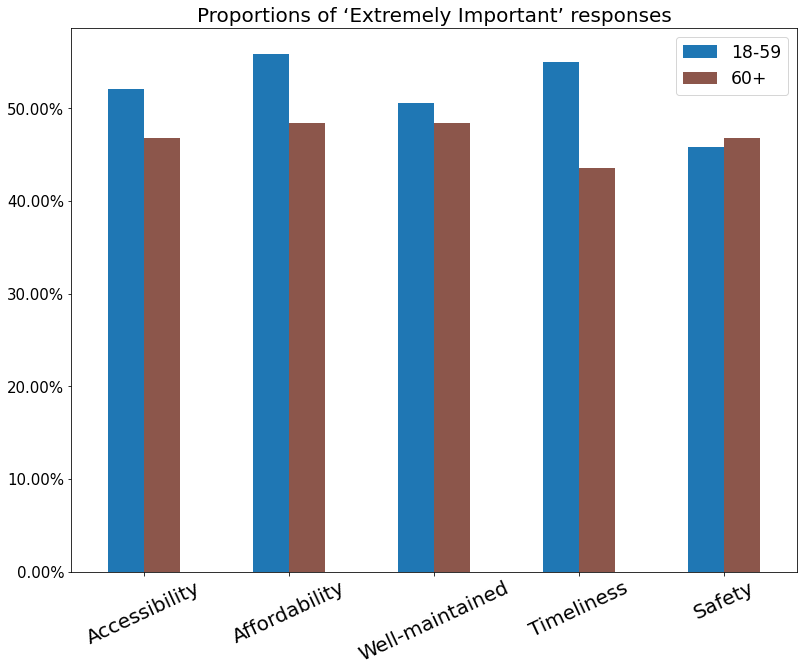

In [22]:
plt.figure(figsize=(20,100))
ax = factor_importance.transpose().plot.bar(figsize=(13,10),rot=0,color=['tab:blue','tab:brown'])

plt.title('Proportions of ‘Extremely Important’ responses', fontsize=20)
plt.ylabel('',fontsize=10)
ax.tick_params(axis='y',labelsize=15)
#ax.set_yticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=25)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

In [23]:
#Accessibility
under_60_pub = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q24G'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24G'].value_counts().sum()
sixty_plus_pub = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q24G'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24G'].value_counts().sum()

#Affordability
under_60_walk =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24A'] == 'Yes')]['Q24A'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24A'].value_counts().sum()
sixty_plus_walk = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24A'] == 'Yes')]['Q24A'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24A'].value_counts().sum()

#Well-maintained
under_60_drive = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24B'] == 'Yes')]['Q24B'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24B'].value_counts().sum()
sixty_plus_drive = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24B'] == 'Yes')]['Q24B'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24B'].value_counts().sum()

#Timeliness
under_60_taxi = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24C'] == 'Yes')]['Q24C'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24C'].value_counts().sum()
sixty_plus_taxi = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24C'] == 'Yes')]['Q24C'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24C'].value_counts().sum()

#Safety
under_60_uber =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24D'] == 'Yes')]['Q24D'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24D'].value_counts().sum()
sixty_plus_uber = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24D'] == 'Yes')]['Q24D'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24D'].value_counts().sum()

#special trans
under_60_special =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24F'] == 'Yes')]['Q24F'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24F'].value_counts().sum()
sixty_plus_special = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24F'] == 'Yes')]['Q24F'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24F'].value_counts().sum()

#no leave
under_60_no =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24J'] == 'Yes')]['Q24J'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24J'].value_counts().sum()
sixty_plus_no = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24J'] == 'Yes')]['Q24J'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24J'].value_counts().sum()

In [24]:
pub_trans = under_60_pub.append(sixty_plus_pub)
walk = under_60_walk.append(sixty_plus_walk)
drive = under_60_drive.append(sixty_plus_drive)
taxi = under_60_taxi.append(sixty_plus_taxi)
uber = under_60_uber.append(sixty_plus_uber)
special = under_60_special.append(sixty_plus_special)
noleave = under_60_no.append(sixty_plus_no)
walk

<ipython-input-24-d4710122c6ff>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pub_trans = under_60_pub.append(sixty_plus_pub)
<ipython-input-24-d4710122c6ff>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  walk = under_60_walk.append(sixty_plus_walk)
<ipython-input-24-d4710122c6ff>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drive = under_60_drive.append(sixty_plus_drive)
<ipython-input-24-d4710122c6ff>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  taxi = under_60_taxi.append(sixty_plus_taxi)
<ipython-input-24-d4710122c6ff>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a futu

Yes    0.463514
Yes    0.370450
Name: Q24A, dtype: float64

In [25]:
uber

Yes    0.074324
Yes    0.059957
Name: Q24D, dtype: float64

In [26]:
#Make a new dataframe with all the factor
mode_frame = pd.DataFrame({'Public Transit': pub_trans,
                   'Walk': walk, 'Drive': drive, 'Taxi': taxi, 'Uber': uber, 'Special Services': special, 'Dont Leave': noleave
                          })

#Rename the rows to the respective age groups
mode_frame = mode_frame.set_axis(['18-59','60+'],axis=0)
mode_frame

,Public Transit,Walk,Drive,Taxi,Uber,Special Services,Dont Leave
18-59,0.229730,0.463514,0.783784,0.347973,0.074324,0.036486,0.027027
60+,0.132762,0.370450,0.837259,0.310493,0.059957,0.072805,0.004283


<ipython-input-27-184fe33aeda7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

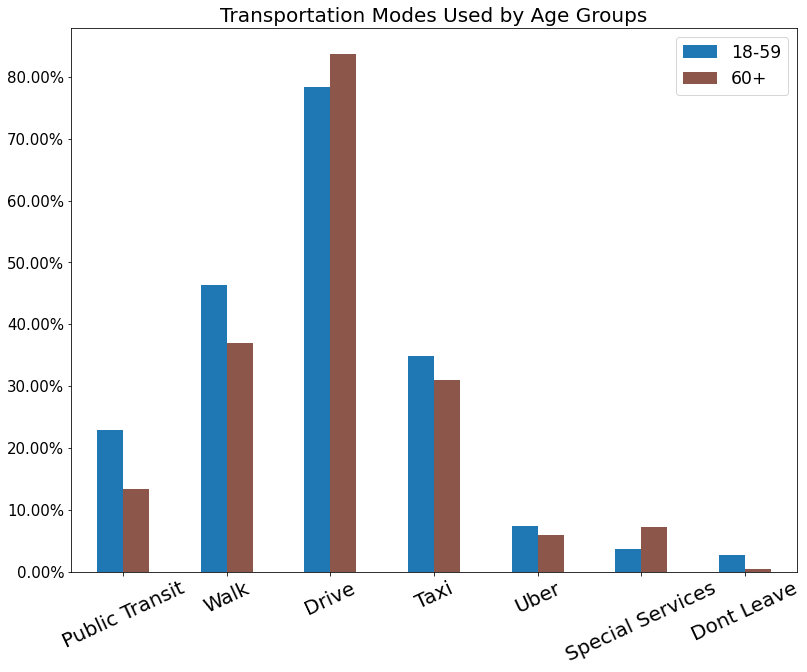

In [27]:
plt.figure(figsize=(20,100))
ax = mode_frame.transpose().plot.bar(figsize=(13,10),rot=0,color=['tab:blue','tab:brown'])

plt.title('Transportation Modes Used by Age Groups', fontsize=20)
plt.ylabel('',fontsize=10)
ax.tick_params(axis='y',labelsize=15)
#ax.set_yticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=25)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

## overall breakdowns

In [28]:
df_2018['Q28_3A'].value_counts(normalize=True)

Extremely important     0.276836
Very important          0.264510
Somewhat important      0.231638
Not very important      0.138161
Not at all important    0.083719
SKIPPED ON WEB          0.005136
Name: Q28_3A, dtype: float64

In [29]:
df_2018['Q28_3B'].value_counts(normalize=True)

Extremely important     0.319979
Very important          0.297894
Somewhat important      0.212121
Not very important      0.094504
Not at all important    0.068824
SKIPPED ON WEB          0.006677
Name: Q28_3B, dtype: float64

In [30]:
df_2018['Q28_3C'].value_counts(normalize=True)

Very important          0.323061
Extremely important     0.310221
Somewhat important      0.204417
Not very important      0.091936
Not at all important    0.064715
SKIPPED ON WEB          0.005650
Name: Q28_3C, dtype: float64

In [31]:
df_2018['Q28_3D'].value_counts(normalize=True)

Extremely important     0.323575
Very important          0.317411
Somewhat important      0.196713
Not very important      0.087314
Not at all important    0.070365
SKIPPED ON WEB          0.004622
Name: Q28_3D, dtype: float64

In [32]:
df_2018['Q28_3E'].value_counts(normalize=True)

Extremely important     0.324088
Very important          0.319979
Somewhat important      0.210580
Not very important      0.070365
Not at all important    0.068824
SKIPPED ON WEB          0.006163
Name: Q28_3E, dtype: float64

In [33]:
df_2018['D26'].value_counts(normalize=True)

Suburban and mostly residential                         0.218285
Urban and mostly residential                            0.193118
Suburban with a mix of offices, apartments and shops    0.168464
Urban near mix of offices, apartments and shops         0.159733
Small town                                              0.133539
Rural area                                              0.119158
SKIPPED ON WEB                                          0.006163
DON’T KNOW                                              0.001541
Name: D26, dtype: float64

In [34]:
df_2018['AGE4'].value_counts(normalize=True)

30-44    0.279404
18-29    0.252183
60+      0.239856
45-59    0.228557
Name: AGE4, dtype: float64

In [35]:
df_2018['INCOME'].value_counts(normalize=True)

$40,000 to $49,999      0.088855
$50,000 to $59,999      0.088341
$85,000 to $99,999      0.087314
$60,000 to $74,999      0.084232
$100,000 to $124,999    0.073960
$20,000 to $24,999      0.069337
$25,000 to $29,999      0.063688
$10,000 to $14,999      0.058552
$30,000 to $34,999      0.057524
$125,000 to $149,999    0.047766
$15,000 to $19,999      0.047252
$35,000 to $39,999      0.044684
$75,000 to $84,999      0.043657
$5,000 to $9,999        0.040575
Less than $5,000        0.036466
$200,000 or more        0.031330
$150,000 to $174,999    0.027735
$175,000 to $199,999    0.008731
Name: INCOME, dtype: float64

In [36]:
df_2018['Q24G'].value_counts(normalize=True)

No                0.702106
Yes               0.206471
SKIPPED ON WEB    0.090909
DON’T KNOW        0.000514
Name: Q24G, dtype: float64

### -------------------------------------------------------------------------------------------------------------------------------------------------------

# Feature Engineering

### Create Binary Dependent Variable for someone using public transit

In [37]:
df_2018['uses_pt'] = df_2018['Q24G'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

In [38]:
#Look at the distribution
df_2018['uses_pt'].value_counts()

0    1545
1     402
Name: uses_pt, dtype: int64

### Create New Feature that identifies how many modes of Transportation someone uses

In [39]:
#Create New Variable
df_2018['number_of_modes'] = 0

#Loop through the questions that establish which modes used
for question in df_2018[['Q24G','Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J']]:
    
    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, then add one count to the new variable
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,260]+=1
        
        #update the index    
        index +=1
        

## Create features that identifies if some one travels completely independently, completely dependently, or both

In [40]:
#Create completely Independent Travel Variable
df_2018['independent_travel'] = 0

#Loop through completely independent modes
for question in df_2018[['Q24A','Q24B','Q24H']]:

    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, set equal to 1
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,261] = 1
        
        #update the index    
        index +=1

In [41]:
#check values
df_2018['independent_travel'].value_counts()

1    1726
0     221
Name: independent_travel, dtype: int64

In [42]:
#Create completely Dependent Travel Variable
df_2018['dependent_travel'] = 0

#Loop through completely dependent modes
for question in df_2018[['Q24G','Q24C','Q24D','Q24E','Q24F']]:
    
    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, set equal to 1
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,262] = 1
        
        #update the index    
        index +=1

In [43]:
#check values
df_2018['dependent_travel'].value_counts()

0    1066
1     881
Name: dependent_travel, dtype: int64

In [44]:
#Create Both Travel Variable, this is where if independent and dependent equal 1, put both as 1, if not put 0
df_2018['both_travel'] = np.where((df_2018['independent_travel'] == 1) & (df_2018['dependent_travel'] == 1), 1, 0)

#update completely independent travel variable, this says if there is a 1 in either dependent or both, make a 0, if not keep as is
df_2018['independent_travel'] = np.where((df_2018['both_travel'] == 1) | (df_2018['dependent_travel'] == 1), 0, df_2018['independent_travel'])

#update completely dependent travel variable, this says if there is a 1 in either independent or both, make a 0, if not keep as is
df_2018['dependent_travel'] = np.where((df_2018['both_travel'] == 1) | (df_2018['independent_travel'] == 1), 0, df_2018['dependent_travel'])

In [45]:
#wanted to note that I left out the 'some other way' and 'dont leave the house', so they will be 0's for everything at this point
#if we want to make an other column we can do that too

In [46]:
#checking
df_2018

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,dumover18,dumcollege,dumparents,dumother,countInHouse,uses_pt,number_of_modes,independent_travel,dependent_travel,both_travel
0,0,54.0,0.756810,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,No,No,...,Other,Other,Other,Yes,1.0,0,2,1,0,0
1,1,56.0,2.931238,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Yes,Other,Other,Other,1.0,0,1,1,0,0
2,2,67.0,6.867710,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,Yes,No,Yes,...,Other,Other,Yes,Yes,2.0,0,0,0,0,0
3,3,68.0,0.827716,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,Other,Other,Other,Other,1.0,0,0,0,0,0
4,4,72.0,0.712991,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move to a different community,No,Yes,No,...,Other,Other,Other,Other,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1942,8204.0,0.408771,Straight (that is not gay/lesbian),Neither agree nor disagree,Neither agree nor disagree,Move to a different community,No,No,No,...,Other,Other,Yes,Other,1.0,0,1,1,0,0
1943,1943,8205.0,0.043247,Gay/lesbian,Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Other,Other,Other,0.0,1,1,0,1,0
1944,1944,8208.0,0.357296,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,Yes,Yes,...,Other,Other,Other,Other,0.0,0,3,0,0,1
1945,1945,8210.0,1.140623,Straight (that is not gay/lesbian),Neither agree nor disagree,Neither agree nor disagree,Move to a different community,Yes,No,Yes,...,Other,Other,Other,Other,0.0,0,1,1,0,0


In [47]:
#checking, adds up to 1947
df_2018['independent_travel'].value_counts()

0    1028
1     919
Name: independent_travel, dtype: int64

In [48]:
#checking, adds up to 1947
df_2018['dependent_travel'].value_counts()

0    1873
1      74
Name: dependent_travel, dtype: int64

In [49]:
#checking, adds up to 1947
df_2018['both_travel'].value_counts()

0    1140
1     807
Name: both_travel, dtype: int64

### Establish binary variable for senior

In [50]:
#Create a new binary variable for elderly population
df_2018['senior'] = df_2018['AGE4'].apply(lambda x: 1 if x == '60+' else 0).astype(int)

# Data Cleaning
### *Variables Cleaned for modelling are put in a new data frame*

In [51]:
# Copy dataframe for cleaning and modelling
df_clean = df_2018.copy()

In [52]:
df_2018['Q24G'].unique()

array(['No', 'SKIPPED ON WEB', 'Yes', 'DON’T KNOW'], dtype=object)

### Change Transportation Mode Questions to binary variables

In [53]:
# Answers included either 'Yes', 'No', 'Skipped on Web', or 'Don't Know'. 'Skipped on Web' and 'Don't Know' are classified as they do not use that transportation
df_clean['Q24G'] = df_clean['Q24G'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24A'] = df_clean['Q24A'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24B'] = df_clean['Q24B'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24C'] = df_clean['Q24C'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24D'] = df_clean['Q24D'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24E'] = df_clean['Q24E'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24F'] = df_clean['Q24F'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24J'] = df_clean['Q24J'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

### Re-Code Importance Factors on a 5 point Scale

In [54]:
#'Skipped on Web' will be classified as a null value since the importance is not recorded. It will be replaced with the mean after importance has been recoded

#Recode Importance Level on a 5 point scale and replace variable with appropriate value on scale
df_clean['Q28_3A'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3A'].replace('Very important',4,inplace=True)
df_clean['Q28_3A'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3A'].replace('Not very important',2,inplace=True)
df_clean['Q28_3A'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3A'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3B'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3B'].replace('Very important',4,inplace=True)
df_clean['Q28_3B'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3B'].replace('Not very important',2,inplace=True)
df_clean['Q28_3B'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3B'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3C'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3C'].replace('Very important',4,inplace=True)
df_clean['Q28_3C'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3C'].replace('Not very important',2,inplace=True)
df_clean['Q28_3C'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3C'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3D'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3D'].replace('Very important',4,inplace=True)
df_clean['Q28_3D'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3D'].replace('Not very important',2,inplace=True)
df_clean['Q28_3D'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3D'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3E'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3E'].replace('Very important',4,inplace=True)
df_clean['Q28_3E'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3E'].replace('Not very important',2,inplace=True)
df_clean['Q28_3E'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3E'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3F'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3F'].replace('Very important',4,inplace=True)
df_clean['Q28_3F'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3F'].replace('Not very important',2,inplace=True)
df_clean['Q28_3F'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3F'].replace('SKIPPED ON WEB',np.NaN,inplace=True)
df_clean['Q28_3F'].replace('DON’T KNOW',np.NaN,inplace=True)

### -------------Verify Cleaning importance variables was executed correctly-----------------------

In [55]:
df_2018['Q28_3C']

0       Not at all important
1        Extremely important
2         Somewhat important
3             Very important
4         Not very important
                ...         
1942    Not at all important
1943     Extremely important
1944          Very important
1945          Very important
1946          Very important
Name: Q28_3C, Length: 1947, dtype: object

In [56]:
df_clean["Q28_3C"]

0       1.0
1       5.0
2       3.0
3       4.0
4       2.0
       ... 
1942    1.0
1943    5.0
1944    4.0
1945    4.0
1946    4.0
Name: Q28_3C, Length: 1947, dtype: float64

# # dropping rows where all answers are the same

In [57]:
df_clean = df_clean.loc[~((df_clean['Q28_3A'] == df_clean['Q28_3B']) & (df_clean['Q28_3A'] == df_clean['Q28_3C']) & (df_clean['Q28_3A'] == df_clean['Q28_3D']) & (df_clean['Q28_3A'] == df_clean['Q28_3E'])& (df_clean['Q28_3A'] == df_clean['Q28_3D']))] 

<AxesSubplot:>

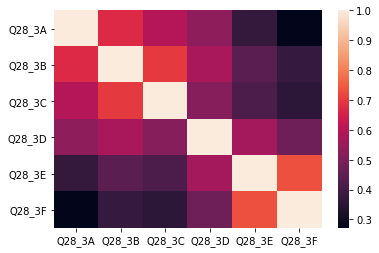

In [58]:
sns.heatmap(df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].corr())

### Replace Null Values with the mean of it's variable

In [59]:
#Look at the mean value of each question
df_clean.groupby('AGE4')[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

Q28_3A                                              Q28_3B            \
       count      mean       std  min  25%  50%  75%  max  count      mean   
AGE4                                                                         
18-29  297.0  3.387205  1.139688  1.0  3.0  3.0  4.0  5.0  295.0  3.722034   
30-44  293.0  3.238908  1.148669  1.0  2.0  3.0  4.0  5.0  290.0  3.617241   
45-59  220.0  3.150000  1.142875  1.0  2.0  3.0  4.0  5.0  222.0  3.558559   
60+    244.0  3.258197  1.116162  1.0  3.0  3.0  4.0  5.0  244.0  3.577869   

       ... Q28_3E      Q28_3F                                               
       ...    75%  max  count      mean       std  min  25%  50%  75%  max  
AGE4   ...                                                                  
18-29  ...    4.0  5.0  296.0  3.415541  1.146681  1.0  3.0  4.0  4.0  5.0  
30-44  ...    4.0  5.0  292.0  3.606164  1.041590  1.0  3.0  4.0  4.0  5.0  
45-59  ...    5.0  5.0  222.0  3.702703  1.085441  1.0  3.0  4.0  5.0  5.0  
60+    ...    5.0  5.0  244.0  3.709016  1.089305  1.0  3.0  4.0  5.0  5.0  

[4 rows x 48 columns]

### Since all questions have a mean close to 4, we can re-code all NA variables to 4 (can not use the mean because that would be inbetween two categorical values)

In [60]:
df_clean['Q28_3A'].fillna(4,inplace=True)
df_clean['Q28_3B'].fillna(4,inplace=True)
df_clean['Q28_3C'].fillna(4,inplace=True)
df_clean['Q28_3D'].fillna(4,inplace=True)
df_clean['Q28_3E'].fillna(4,inplace=True)
df_clean['Q28_3F'].fillna(4,inplace=True)

### Table looking at mean values of importance values for seniors

In [61]:
df_clean[(df_clean['AGE4']=='60+') & (df_clean['uses_pt']==1)][['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].mean()

Q28_3A    4.111111
Q28_3B    4.185185
Q28_3C    4.074074
Q28_3D    4.074074
Q28_3E    3.888889
Q28_3F    3.703704
dtype: float64

1    79
Name: uses_pt, dtype: int64
0    223
1     79
Name: uses_pt, dtype: int64


<Figure size 1440x7200 with 0 Axes>

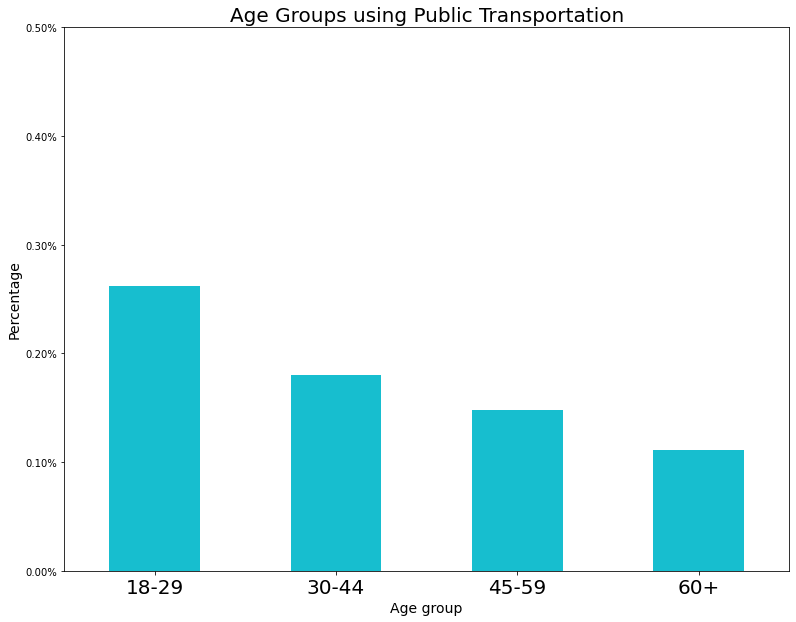

In [62]:

# Create bins for each importance factor to seniors and track normalized value counts
print(df_clean[(df_clean['AGE4']=='18-29') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts())
print(df_clean[df_clean['AGE4']=='18-29']['uses_pt'].value_counts())
under_30 = df_clean[(df_clean['AGE4']=='18-29') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='18-29']['uses_pt'].value_counts().sum()
thirty_to_44 = df_clean[(df_clean['AGE4']=='30-44') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='30-44']['uses_pt'].value_counts().sum()
forty5_to_59 = df_clean[(df_clean['AGE4']=='45-59') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='45-59']['uses_pt'].value_counts().sum()
seniors = df_clean[(df_clean['AGE4']=='60+') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='60+']['uses_pt'].value_counts().sum()

#Create a new dataframe with all age groups to visualize
age_groups = pd.DataFrame([under_30,thirty_to_44,forty5_to_59,seniors])

#Make the graph
plt.figure(figsize=(20,100))
ax = age_groups.plot.bar(stacked=False,figsize=(13,10),rot=0,color='tab:cyan')

plt.title('Age Groups using Public Transportation', fontsize=20)
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Age group', fontsize=14)
ax.set_xticklabels( ('18-29','30-44','45-59','60+') )
ax.tick_params(axis='x', labelsize=20,rotation=0)
# remove legend
ax.get_legend().remove()
# set y axis limit
ax.set_ylim([0, 0.5])
# we also want the y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

###  Use Transportation by Community Type

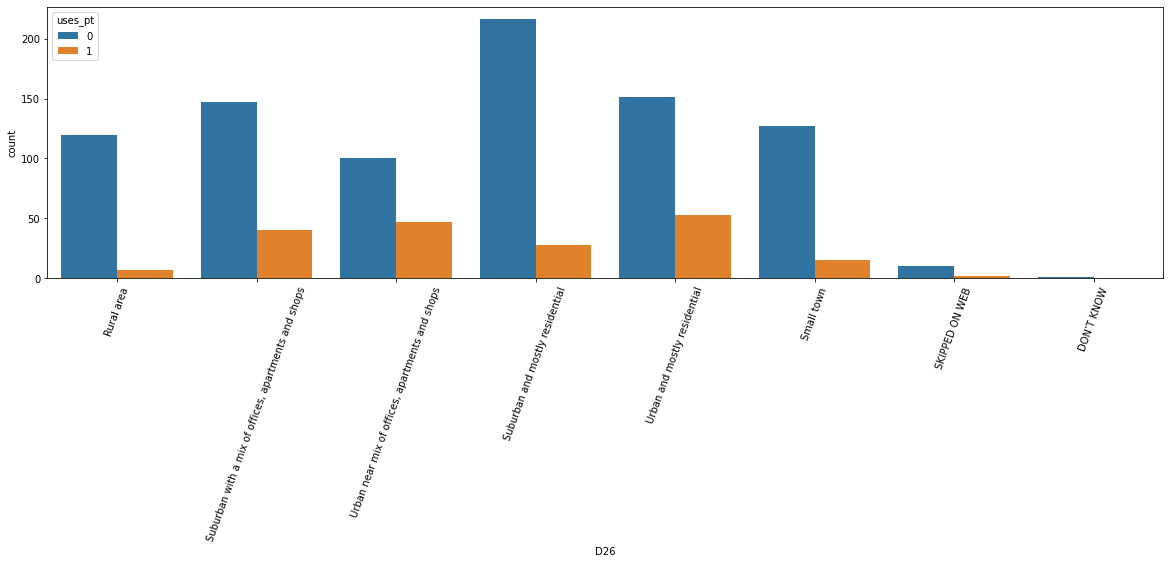

In [74]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'D26', hue= 'uses_pt', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

## Use Transportation by Income

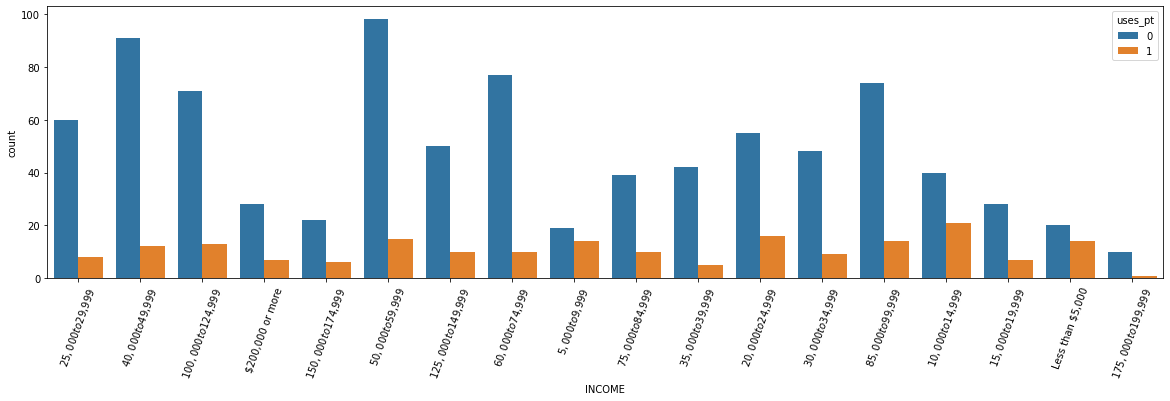

In [75]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'INCOME', hue= 'uses_pt', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

## Age by Community Type

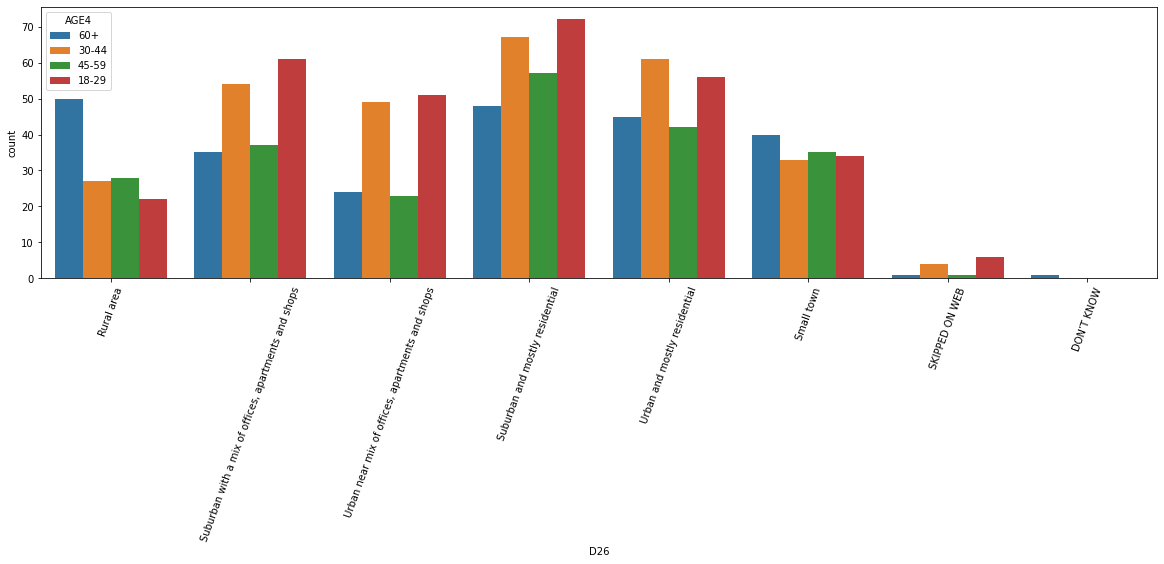

In [76]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'D26', hue= 'AGE4', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

## Age and Income

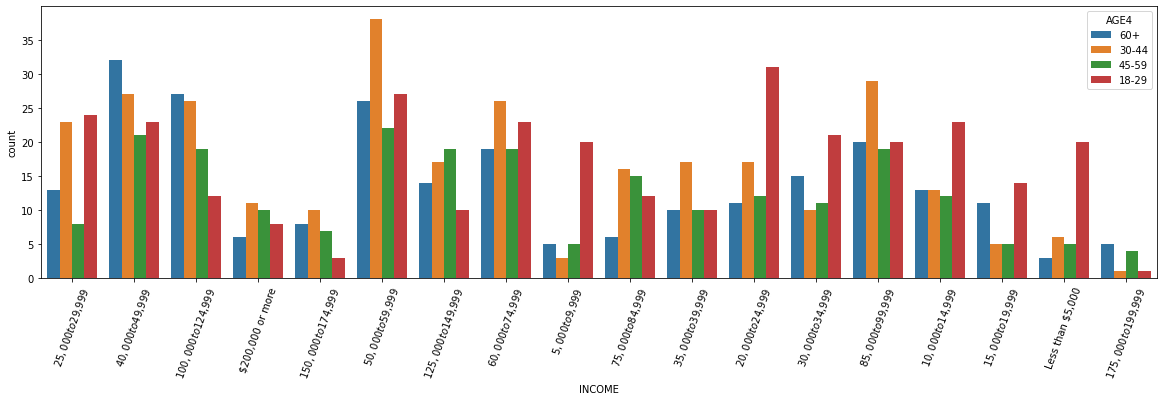

In [78]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'INCOME', hue= 'AGE4', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

In [34]:
age_groups

,1
uses_pt,0.261589
uses_pt,0.179661
uses_pt,0.147982
uses_pt,0.110656


<AxesSubplot:xlabel='AGE4,uses_pt'>

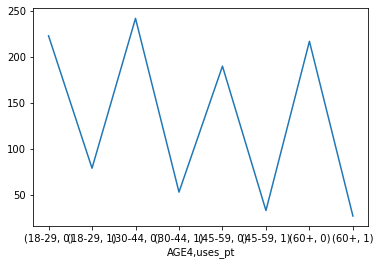

In [35]:
df_clean.groupby('AGE4')['uses_pt'].value_counts().plot(kind='line')

In [36]:
df_clean[(df_clean['AGE4']!='60+') & (df_clean['uses_pt']==1)][['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,3.969697,4.084848,4.030303,4.169697,3.787879,3.484848
std,0.984169,1.014565,0.829518,0.887750,0.922535,1.140208
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Kruskal-Wallis H test between elderly and other ages

In [37]:
from scipy.stats import ttest_ind
import statistics
from scipy import stats

In [38]:
seniors = df_clean[df_clean['AGE4']=='60+']
other_age = df_clean[df_clean['AGE4']!='60+']

In [39]:
print(statistics.variance(seniors['Q28_3A']) == statistics.variance(other_age['Q28_3A']))

False


In [41]:
stats.kruskal(seniors['Q28_3A'], other_age['Q28_3A'])

KruskalResult(statistic=0.013998009431264342, pvalue=0.9058195117072689)

In [42]:
print(statistics.variance(seniors['Q28_3B']) == statistics.variance(other_age['Q28_3B']))

False


In [43]:
stats.kruskal(seniors['Q28_3B'], other_age['Q28_3B'])

KruskalResult(statistic=0.679126130662032, pvalue=0.4098878003547658)

In [44]:
print(statistics.variance(seniors['Q28_3C']) == statistics.variance(other_age['Q28_3C']))

False


In [45]:
stats.kruskal(seniors['Q28_3C'], other_age['Q28_3C'])

KruskalResult(statistic=0.35453390864265505, pvalue=0.5515577473681598)

In [46]:
print(statistics.variance(seniors['Q28_3D']) == statistics.variance(other_age['Q28_3D']))

False


In [47]:
stats.kruskal(seniors['Q28_3D'], other_age['Q28_3D'])

KruskalResult(statistic=1.5316351535358195, pvalue=0.21586720315598842)

In [48]:
print(statistics.variance(seniors['Q28_3E']) == statistics.variance(other_age['Q28_3E']))

False


In [49]:
stats.kruskal(seniors['Q28_3E'],other_age['Q28_3E'])

KruskalResult(statistic=0.9348117511528862, pvalue=0.3336157079934995)

In [50]:
print(statistics.variance(seniors['Q28_3F']) == statistics.variance(other_age['Q28_3F']))

False


In [51]:
stats.kruskal(seniors['Q28_3F'], other_age['Q28_3F'])

KruskalResult(statistic=3.6276567661627985, pvalue=0.0568267727461436)

In [ ]:
#none of them are different lol, so we say that there is no difference between the elderly and regular people, so we can use
#perceptions of everyone and its the same difference

## a box plot

In [ ]:
ax = sns.boxplot(x='uses_pt', y='Q28_3A', data=df_clean[df_clean['AGE4']=='60+'], color='#99c2a2')
ax = sns.swarmplot(x="uses_pt", y="Q28_3A", data=df_clean[df_clean['AGE4']=='60+'], color='#7d0013')
plt.show()

In [ ]:
df_clean.info

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['1'], df['0'],)
print(fvalue, pvalue)

### -----------------------------------------------------------------------------------------------------------------------

# Visualizations-these have changed a bit because they are being done on cleaned data, not sure if we want to do a before and after cleaning

In [ ]:
# Create bins for each transportation mode used by seniors and track normalized value counts
pub_trans = seniors['Q24G'].value_counts(sort=False,normalize=True)
walk = seniors['Q24A'].value_counts(sort=False,normalize=True)
drive = seniors['Q24B'].value_counts(sort=False,normalize=True)
others_drive = seniors['Q24C'].value_counts(sort=False,normalize=True)
taxi = seniors['Q24D'].value_counts(sort=False,normalize=True)
uber = seniors['Q24E'].value_counts(sort=False,normalize=True)
special_trans = seniors['Q24F'].value_counts(sort=False,normalize=True)
no_leave = seniors['Q24J'].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
transit_modes = pd.DataFrame([pub_trans,walk,drive,others_drive,taxi,uber,special_trans,no_leave])

#Make the graph
plt.figure(figsize=(20,100))
ax = transit_modes[1].plot.bar(stacked=False,figsize=(13,10),rot=0)

plt.title('Modes of Transportation for Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.set_xticklabels( ('Public Transit', 'Walk','Drive','Have Others Drive Them','Taxi','Uber/Lyft','Special Transit','Does not Leave House') )
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

In [ ]:
# Create bins for each importance factor to seniors and track normalized value counts
close = seniors['Q28_3A'].value_counts(sort=True,normalize=True)
affordable = seniors['Q28_3B'].value_counts(sort=False,normalize=True)
maintained = seniors['Q28_3C'].value_counts(sort=False,normalize=True)
timely = seniors['Q28_3D'].value_counts(sort=False,normalize=True)
safe = seniors['Q28_3E'].value_counts(sort=False,normalize=True)
special_services = seniors['Q28_3F'].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
importance_factors = pd.DataFrame([close,affordable,maintained,timely,safe,special_services])

#Make the graph
plt.figure(figsize=(20,100))
ax = importance_factors.plot.bar(stacked=False,figsize=(13,10),rot=0)

plt.title('Importance Factors for Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.set_xticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

In [ ]:
# how many types of transportation modes do seniors use-kaylee

# I want to use groupby feature to see the breakdown of each mode, but that still needs to come because that info
# isn't in the seniors database yet, and I also need to make sure its in order with that random 0
plt.figure(figsize=(20,100))
ax = seniors['number_of_modes'].value_counts(sort=True).plot.bar(stacked=False,figsize=(13,10),rot=0)
plt.title('How Many Different Modes of Transportation Are Used by Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

In [ ]:
sns.regplot(data=df_clean,x='Q28_3E',y='uses_pt')

In [ ]:
for i in df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].columns:
    pd.crosstab(df_clean[i],df_clean['uses_pt'],normalize='index').plot(kind='bar')
    plt.title(i)
    plt.show()

In [ ]:
df_clean.loc[(df_clean['Salary_in_1000']>=100) & (df_clean['Age']< 60)]

In [ ]:
# Create bins for each importance factor to seniors and track normalized value counts
close = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3A']].value_counts(sort=False,normalize=True)
affordable = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3B']].value_counts(sort=False,normalize=True)
maintained = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3C']].value_counts(sort=False,normalize=True)
timely = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3D']].value_counts(sort=False,normalize=True)
safe = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3E']].value_counts(sort=False,normalize=True)
special_services = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3F']].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
importance_factors = pd.DataFrame([close,affordable,maintained,timely,safe,special_services])

chart_frame = importance_factors.transpose()

#Make the graph
plt.figure(figsize=(20,100))
ax = chart_frame.plot.line(figsize=(13,10),rot=0)

plt.title('Importance Factors for Seniors who use Public Transportation', fontsize=20)
plt.ylabel('Percentage of Respondents',fontsize=14)
ax.set_xticklabels(('Not at all Important','Not very important','Somewhat important','Very Important','Extremely Important'))
ax.tick_params(axis='x', labelsize=20,rotation=65)
ax.set_xticks([1,2,3,4,5])
plt.show()

In [ ]:
df_clean.to_csv('Data/clean_df.csv')